<a href="https://colab.research.google.com/github/JyothsnaGH/PythonforFinance/blob/main/Train_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-learn

### Split a dataset into training and testing sets

In [2]:
#Imports
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns



- Independent variables or attributes: `X`
- Dependent variable or target: `y`.


In [3]:
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target

In [4]:
from sklearn.utils import shuffle
X
y
X, y = shuffle(X, y)

### The Target Variable X is a prediction of what kind of flower class the observation belongs to.      
Class 0: Setosa      
Class 1: Versicolor      
Class 1: Virginica  

Since our data is sorted ascending by class, we do not want to end up in a situation where the training dataset contains only 0 and 1 labels, while the test only contains Virginica (class 2). Hence, we should **randomly shuffle the dataset before we split the dataset**.



### Split the data into training and testing.

- scikit-learn package comprises a pre-built function to split data into training and testing sets.
- Here, we use 50% of the data as training, and 50% testing.


In [5]:
#Import Module
from sklearn.model_selection import train_test_split


train_X, test_X, train_y, test_y = train_test_split(X, y,
                                                    train_size=0.5,
                                                    test_size=0.5,
                                                    random_state=122)
print("Labels for training and testing data")
print(train_y)
print(test_y)

Labels for training and testing data
[0 2 2 2 1 1 0 2 2 1 1 1 1 0 2 1 1 1 0 1 1 2 0 1 2 2 1 2 0 0 1 2 2 0 2 0 2
 1 0 2 2 0 0 2 2 2 0 2 0 1 2 2 1 0 1 2 0 1 0 1 1 0 0 2 1 0 2 2 0 0 1 1 2 1
 2]
[1 0 1 0 1 1 1 0 0 0 2 0 2 0 0 1 2 0 2 1 1 1 0 2 2 1 0 0 2 1 1 2 1 2 0 2 0
 0 2 0 1 0 1 1 0 2 1 1 1 0 2 1 2 2 0 0 2 1 1 1 2 0 0 0 2 2 2 2 1 1 2 0 0 0
 0]


---

## Logistic Regression: Classification

---

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

classifier = LogisticRegression(max_iter=10000, random_state=0)
classifier.fit(train_X, train_y)


LogisticRegression(max_iter=10000, random_state=0)

In [7]:
prediction = classifier.predict(test_X)

In [8]:
print(prediction)
print(test_y)

[1 0 1 0 1 1 1 0 0 0 2 0 2 0 0 1 2 0 2 1 1 1 0 2 2 1 0 0 2 1 1 2 1 2 0 2 0
 0 2 0 1 0 1 1 0 2 1 1 1 0 1 1 2 1 0 0 2 2 2 1 2 0 0 0 2 1 2 2 1 1 2 0 0 0
 0]
[1 0 1 0 1 1 1 0 0 0 2 0 2 0 0 1 2 0 2 1 1 1 0 2 2 1 0 0 2 1 1 2 1 2 0 2 0
 0 2 0 1 0 1 1 0 2 1 1 1 0 2 1 2 2 0 0 2 1 1 1 2 0 0 0 2 2 2 2 1 1 2 0 0 0
 0]


## Performance Metric: Accuracy

In [9]:
acc = accuracy_score(test_y, classifier.predict(test_X)) * 100
accuracy = accuracy_score(test_y, prediction) * 100
print(f"Logistic Regression model accuracy: {accuracy:.2f}%")

Logistic Regression model accuracy: 93.33%


### Alternative Ways of Calculating the accuracy.

In [10]:
np.mean(prediction == test_y)
classifier.score(test_X, test_y)

0.9333333333333333

In [11]:
# performance on the training set
classifier.score(train_X, train_y)

0.9866666666666667

## Now, try 80% and 20% split.

## K Nearest Neighbors

In [12]:
from sklearn.neighbors import KNeighborsClassifier

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Create KNN classifier with k=3
# knn = KNeighborsClassifier(n_neighbors=3)

# Set a parameter for how many nearest neighbors you want to examine.
knn = KNeighborsClassifier(n_neighbors=1) # only 1 neighbor

# Train the model
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = 100*accuracy_score(y_test, y_pred)
print(f"kNN Accuracy: {accuracy}")

kNN Accuracy: 96.0


## Decision Tree Classifier

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# Split the dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Create Decision Tree classifer object
classifier = DecisionTreeClassifier()

# Train Decision Tree Classifer
classifier = classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test) # predict

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print('Accuracy:',classifier.score(X_test, y_test))

Accuracy: 0.9333333333333333
Accuracy: 0.9333333333333333


## Performance Metrics

In [14]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

In [15]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[13  0  0]
 [ 0 14  1]
 [ 0  2 15]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.88      0.93      0.90        15
           2       0.94      0.88      0.91        17

    accuracy                           0.93        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.93      0.93      0.93        45



## NOTE: We cannot plot AUC-ROC curves for multiclass dependent variables. The output has to be binary (Yes/No, Spam/Not Spam, Fail/Pass). Setosa/Versicolor/Virginica will not work.

### So, let us try plotting ROC for a diabetes dataset.

In [30]:
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler

In [36]:
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

# # Convert the target variable to binary (1 for diabetes, 0 for no diabetes)
y_binary = (y > np.median(y)).astype(int)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=142)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Accuracy: 78.65%
Confusion Matrix:
 [[34 11]
 [ 8 36]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.76      0.78        45
           1       0.77      0.82      0.79        44

    accuracy                           0.79        89
   macro avg       0.79      0.79      0.79        89
weighted avg       0.79      0.79      0.79        89



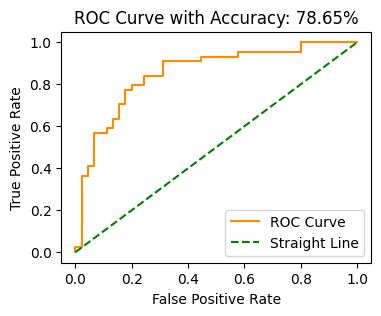

In [49]:
# plot the ROC curve
y_prob = classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, color='darkorange', label='ROC Curve')
plt.plot([0, 1], [0, 1], color='green', linestyle='--', label='Straight Line')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with Accuracy: {:.2f}%'.format(accuracy * 100))
plt.legend(loc="lower right")
plt.show()
